## 2D Transformations in Homogeneous Coordinates

This notebook illustrates the basic componenents of a 2D transformation.  Specifically rotation, translation and scaling.  Just to show we can be contrary, having worked hard to not think of rotation in terms of angles, sines and cosines, here we adopt that formulation to better match common introductory material.

Ross Beveridge
August 29, 2017

As will be common in these notebooks, the next sequence of commands configure options for running the notebook such as how to display math, etc.

In [8]:
%display latex
latex.matrix_delimiters(left='|', right='|')
latex.vector_delimiters(left='[', right=']')

The next block of codes creates the basic four transformation matrices. 

While this should be simple, notice you are being exposed to an aspect of SageMath that shows a mathematicians attention to detail. Namely, the constant PI must be first converted into a value defined on real numbers. If you have never studied Field Theory you are among good company in CS410, for the moment just view the first two lines as how to say to SageMatch that you want to operate with a floating point version of PI.  

On the creation of the rotation matrix notice a couple of things.  First, it is bult off an identiy matrix.  This is a nice way to avoid mistakes when filling out the rest of the homogeneous matrix.  Second, thes is another SageMath typing issue.  Notice the 'SR' argument to creat the identity matrix.  This essentially a way of telling SageMath that the resulting matrix may contain a mix of types including symbolic enteries, floating point entries, and finally integers. 

### Rotation

In [9]:
Re = RealField(100)
theta = -0.0 * Re(pi)
ca = cos(theta)
sa = sin(theta)
RM = matrix.identity(SR,3)
RM[0,0] = ca; RM[0,1] = -sa
RM[1,0] = sa; RM[1,1] =  ca
pretty_print("R = ", RM.n(prec=20))

'R = ' [  1.0000  0.00000  0.00000]
[-0.00000   1.0000  0.00000]
[ 0.00000  0.00000   1.0000]

Specifying the translation transformation is much simpler. Note this formulation breaks out and names the x and y translation components

### Translation

In [10]:
TM = matrix.identity(SR,3)
tx = 0.0; ty = 0.0
TM[0,2] = tx
TM[1,2] = ty
pretty_print("T = ", TM.n(prec=20))

'T = ' [ 1.0000 0.00000 0.00000]
[0.00000  1.0000 0.00000]
[0.00000 0.00000  1.0000]

Scaling is also simple.  Do notice that this setup allows for non-uniform scaling

### Scaling

In [11]:
SM = matrix.identity(SR,3)
sx = 3.0; sy = 3.0
SM[0,0] = sx
SM[1,1] = sy
pretty_print("S = ", SM.n(prec=20))

'S = ' [ 3.0000 0.00000 0.00000]
[0.00000  3.0000 0.00000]
[0.00000 0.00000  1.0000]

Here is the composition in the order translate, then scale and then rotate.  Pay attention to order because these operations are NOT always order independent. 

In [12]:
MM = RM * SM * TM
pretty_print(MM.n(prec=20), " = ")
pretty_print(RM.n(prec=20), SM.n(prec=20), TM.n(prec=20))

[ 3.0000 0.00000 0.00000]
[0.00000  3.0000 0.00000]
[0.00000 0.00000  1.0000] ' = '

[  1.0000  0.00000  0.00000]
[-0.00000   1.0000  0.00000]
[ 0.00000  0.00000   1.0000] [ 3.0000 0.00000 0.00000]
[0.00000  3.0000 0.00000]
[0.00000 0.00000  1.0000] [ 1.0000 0.00000 0.00000]
[0.00000  1.0000 0.00000]
[0.00000 0.00000  1.0000]

The L shaped polygon used in the prior notebook is again used.  Notice here that it is being augmented with a third row of all ones in order to specify the points in homogeneous coordinates

In [13]:
elA = matrix([[1,1],[3,1],[3,2],[2,2],[2,4],[1,4]])
elA = elA.augment(matrix(ZZ,6,1, lambda x,y:1))
elA = elA.transpose()
elB = MM * elA
pretty_print("Before: Pts = ", elA)
pretty_print("After:  Pts = ", elB.n(prec=20))

'Before: Pts = ' [1 3 3 2 2 1]
[1 1 2 2 4 4]
[1 1 1 1 1 1]

'After:  Pts = ' [3.0000 9.0000 9.0000 6.0000 6.0000 3.0000]
[3.0000 3.0000 6.0000 6.0000 12.000 12.000]
[1.0000 1.0000 1.0000 1.0000 1.0000 1.0000]

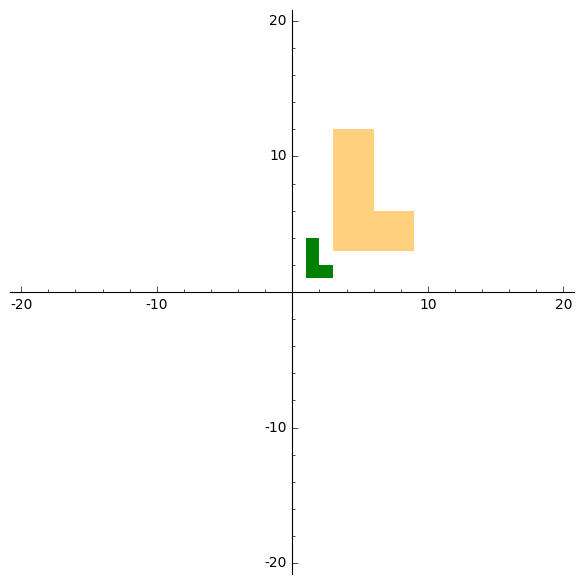

In [14]:
ptsA = list(elA[0:2,:].transpose())
ptsB = list(elB[0:2,:].transpose())
gelA = polygon(ptsA,color='green')
gelB = polygon(ptsB,color='orange',alpha=0.5)
bnd = 20.0
gos = gelA + gelB
gos.show(xmin=-bnd, ymin=-bnd, xmax=bnd, ymax=bnd, aspect_ratio=1)